In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np

In [70]:
VISPUBDATA_PLUS = pd.read_csv('../data/processed/vispubdata_plus.csv')
OPENALEX_CONCEPT_DF = pd.read_csv('../data/processed/openalex_concept_df.csv')
REF_DF = pd.read_csv('../data/processed/large/openalex_reference_concept_df.csv')
CIT_DF = pd.read_csv('../data/processed/large/openalex_citation_concept_df.csv')
REF_ID_NAME = 'Reference OpenAlex ID'
CIT_ID_NAME = 'Citation Paper OpenAlex ID'

REF_DF = REF_DF[REF_DF[REF_ID_NAME].notnull()]
CIT_DF = CIT_DF[CIT_DF[CIT_ID_NAME].notnull()]

In [71]:
ref_unique = pd.read_csv('../data/processed/openalex_reference_concept_df_unique.csv')
ref_unique

,Reference,Reference OpenAlex Year,Reference OpenAlex ID,Reference OpenAlex Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
0,https://openalex.org/W2136766117,2002,W2136766117,The abalone interpolation: a visual interpolat...,14,1,Interpolation (computer graphics),https://openalex.org/C137800194,https://www.wikidata.org/wiki/Q11713455,3,0.696491
1,https://openalex.org/W2136766117,2002,W2136766117,The abalone interpolation: a visual interpolat...,14,2,Computer science,https://openalex.org/C41008148,https://www.wikidata.org/wiki/Q21198,0,0.566627
2,https://openalex.org/W2136766117,2002,W2136766117,The abalone interpolation: a visual interpolat...,14,3,Bilinear interpolation,https://openalex.org/C205203396,https://www.wikidata.org/wiki/Q612143,2,0.511377
3,https://openalex.org/W2136766117,2002,W2136766117,The abalone interpolation: a visual interpolat...,14,4,Multivariate interpolation,https://openalex.org/C203332170,https://www.wikidata.org/wiki/Q6334079,3,0.494562
4,https://openalex.org/W2136766117,2002,W2136766117,The abalone interpolation: a visual interpolat...,14,5,Linear interpolation,https://openalex.org/C171836373,https://www.wikidata.org/wiki/Q2266329,3,0.423620
...,...,...,...,...,...,...,...,...,...,...,...
304708,https://openalex.org/W2049488676,2014,W2049488676,Fast and simple gradient-based optimization fo...,12,8,Hyperparameter optimization,https://openalex.org/C10485038,https://www.wikidata.org/wiki/Q48996162,3,0.346895
304709,https://openalex.org/W2049488676,2014,W2049488676,Fast and simple gradient-based optimization fo...,12,9,Classifier (UML),https://openalex.org/C95623464,https://www.wikidata.org/wiki/Q1096149,2,0.341940
304710,https://openalex.org/W2049488676,2014,W2049488676,Fast and simple gradient-based optimization fo...,12,10,Benchmark (surveying),https://openalex.org/C185798385,https://www.wikidata.org/wiki/Q1161707,2,0.338719
304711,https://openalex.org/W2049488676,2014,W2049488676,Fast and simple gradient-based optimization fo...,12,11,Relevance vector machine,https://openalex.org/C14948415,https://www.wikidata.org/wiki/Q7310972,3,0.332801


In [72]:
cit_unique = CIT_DF.iloc[:, 4:].drop_duplicates()
cit_unique

,Citation Paper Year,Citation Paper OpenAlex ID,Citation Ppaer OpenAlex Title,Citation Paper OpenAlex DOI,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
0,2022.0,W4212788433,Ways of seeing: Peace process Data-viz as a Re...,https://doi.org/10.1177/13548565211050748,5.0,1.0,Sociology,https://openalex.org/C144024400,https://www.wikidata.org/wiki/Q21201,0.0,0.530176
1,2022.0,W4212788433,Ways of seeing: Peace process Data-viz as a Re...,https://doi.org/10.1177/13548565211050748,5.0,2.0,Process (computing),https://openalex.org/C98045186,https://www.wikidata.org/wiki/Q205663,2.0,0.466962
2,2022.0,W4212788433,Ways of seeing: Peace process Data-viz as a Re...,https://doi.org/10.1177/13548565211050748,5.0,3.0,Political science,https://openalex.org/C17744445,https://www.wikidata.org/wiki/Q36442,0.0,0.420657
3,2022.0,W4212788433,Ways of seeing: Peace process Data-viz as a Re...,https://doi.org/10.1177/13548565211050748,5.0,4.0,Engineering ethics,https://openalex.org/C55587333,https://www.wikidata.org/wiki/Q1133029,1.0,0.382229
4,2022.0,W4212788433,Ways of seeing: Peace process Data-viz as a Re...,https://doi.org/10.1177/13548565211050748,5.0,5.0,Public relations,https://openalex.org/C39549134,https://www.wikidata.org/wiki/Q133080,1.0,0.361657
...,...,...,...,...,...,...,...,...,...,...,...
1181697,2022.0,W4213221744,Cerebrovascular Segmentation Model Based on Sp...,https://doi.org/10.3390/app12052288,8.0,4.0,Computer vision,https://openalex.org/C31972630,https://www.wikidata.org/wiki/Q844240,1.0,0.472891
1181698,2022.0,W4213221744,Cerebrovascular Segmentation Model Based on Sp...,https://doi.org/10.3390/app12052288,8.0,5.0,Image segmentation,https://openalex.org/C124504099,https://www.wikidata.org/wiki/Q56933,3.0,0.393520
1181699,2022.0,W4213221744,Cerebrovascular Segmentation Model Based on Sp...,https://doi.org/10.3390/app12052288,8.0,6.0,Pattern recognition (psychology),https://openalex.org/C153180895,https://www.wikidata.org/wiki/Q7148389,2.0,0.374600
1181700,2022.0,W4213221744,Cerebrovascular Segmentation Model Based on Sp...,https://doi.org/10.3390/app12052288,8.0,7.0,Radiology,https://openalex.org/C126838900,https://www.wikidata.org/wiki/Q77604,1.0,0.333800


### How many VIS, REF, and CIT papers have L0 Concept

In [73]:
vis = OPENALEX_CONCEPT_DF.copy()
# total paper number:
len(list(set(vis.DOI)))

3233

In [74]:
# number of VIS papers that have at least one L0 concept
vis_l0_dois = vis[vis.Level == 0].DOI.tolist()
len(list(set(vis_l0_dois)))

3231

In [75]:
len(list(set(vis_l0_dois))) / len(list(set(vis.DOI)))

0.9993813795236622

In [76]:
# how many VIS papers have multiple L0 Concepts
vis_multiple_l0 = list(set(
    [x for x in vis_l0_dois if vis_l0_dois.count(x) > 1]))
len(vis_multiple_l0)

393

In [77]:
len(vis_multiple_l0) / len(list(set(vis.DOI)))

0.12155892360037117

In [78]:
# Total number of unique ref papers
ref_ids = ref_unique['Reference OpenAlex ID'].tolist()
len(list(set(ref_ids)))

39758

In [79]:
# how many ref papers have at least one L0 concept
ref_l0_ids = ref_unique[ref_unique.Level == 0]['Reference OpenAlex ID'].tolist()
len(list(set(ref_l0_ids)))

39543

In [80]:
len(list(set(ref_l0_ids))) / len(list(set(ref_ids)))

0.99459228331405

In [81]:
dic = dict(Counter(ref_l0_ids))
# dff = pd.DataFrame(dic.items(), columns = ['id', 'count'])
ref_multiple = []
for key,value in dic.items():
    if value > 1:
        ref_multiple.append(key)

In [82]:
# How many Ref papers have more than one L0 Concept
len(ref_multiple)

9914

In [83]:
len(ref_multiple) / len(list(set(ref_ids)))

0.2493586196488757

In [84]:
# Total number of unique cit papers
cit_ids = cit_unique['Citation Paper OpenAlex ID'].tolist()
len(list(set(cit_ids)))

59569

In [85]:
# how many cit papers have at least one L0 concept
cit_l0_ids = cit_unique[cit_unique.Level == 0]['Citation Paper OpenAlex ID'].tolist()
len(list(set(cit_l0_ids)))

59304

In [86]:
len(list(set(cit_l0_ids))) / len(list(set(cit_ids)))

0.9955513773942822

In [87]:
dic = dict(Counter(cit_l0_ids))
cit_multiple = []
for key,value in dic.items():
    if value > 1:
        cit_multiple.append(key)

In [88]:
# How many cit papers have more than one L0 Concept
len(cit_multiple)

11538

In [89]:
len(cit_multiple) / len(list(set(cit_ids)))

0.19369134952743877

#### Automation

In [90]:
vis_key = 'DOI'
ref_key = 'Reference OpenAlex ID'
cit_key = 'Citation Paper OpenAlex ID'

In [91]:
keys = [vis_key, ref_key, cit_key]

In [92]:
df_name_lists = ['vis', 'ref', 'cit']

In [93]:
vis_df = vis
ref_df = ref_unique
cit_df = cit_unique

In [94]:
dfs = [vis_df, ref_df, cit_df]

In [95]:
for idx, df in enumerate(dfs):
    key = keys[idx]
    df_name = df_name_lists[idx]
    unique_ids = list(set(df[key]))
    total = len(unique_ids)
    print(f'There are a total of {total} unique papers in {df_name}')
    for LEVEL in range(0, 4):
#         if df_name == 'vis':
        Level_concepts = df[df.Level == LEVEL].Concept
        unique_Level_concepts = list(set(Level_concepts))
        print(f'In {df_name}, there are {len(unique_Level_concepts)} unique L{LEVEL} concepts')
        level_ids = df[df.Level == LEVEL][key].tolist()
        unique_level_ids = list(set(level_ids))
        sub_total = len(unique_level_ids)
        ratio = round(sub_total / total, 3) * 100
        dic = dict(Counter(level_ids))
        id_multiple = []
        for id,value in dic.items():
            if value > 1:
                id_multiple.append(id)
        ratio_multiple = round(len(id_multiple) / total, 3) * 100
        print(f'In {df_name}, {sub_total} ({ratio}%) papers have at least one L{LEVEL} Concept; {len(id_multiple)} ({(ratio_multiple)}%) have more than one')
    print('------------------------------------------------')

There are a total of 3233 unique papers in vis
In vis, there are 17 unique L0 concepts
In vis, 3231 (99.9%) papers have at least one L0 Concept; 393 (12.2%) have more than one
In vis, there are 110 unique L1 concepts
In vis, 2927 (90.5%) papers have at least one L1 Concept; 2157 (66.7%) have more than one
In vis, there are 1218 unique L2 concepts
In vis, 3124 (96.6%) papers have at least one L2 Concept; 2552 (78.9%) have more than one
In vis, there are 508 unique L3 concepts
In vis, 2347 (72.6%) papers have at least one L3 Concept; 1582 (48.9%) have more than one
------------------------------------------------
There are a total of 39758 unique papers in ref
In ref, there are 19 unique L0 concepts
In ref, 39543 (99.5%) papers have at least one L0 Concept; 9914 (24.9%) have more than one
In ref, there are 272 unique L1 concepts
In ref, 34977 (88.0%) papers have at least one L1 Concept; 23770 (59.8%) have more than one
In ref, there are 6015 unique L2 concepts
In ref, 36654 (92.2%) paper

### Visualize

In [96]:
vis_l0 = vis[vis.Level == 0]
vis_l0_concepts = vis_l0.Concept

In [97]:
vis_l0_dic = dict(Counter(vis_l0_concepts))
vis_l0_dic_df = pd.DataFrame(vis_l0_dic.items(), columns = ['concept', 'count'])
vis_l0_dic_df['ratio'] = round(
    vis_l0_dic_df['count'] / vis_l0_dic_df['count'].sum(),
    3)
vis_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
0,Computer science,3198,0.876
1,Mathematics,187,0.051
3,Physics,85,0.023
2,Materials science,65,0.018
5,Medicine,44,0.012
4,Geology,19,0.005
6,Environmental science,18,0.005
7,Psychology,14,0.004
8,Business,6,0.002
9,Chemistry,3,0.001


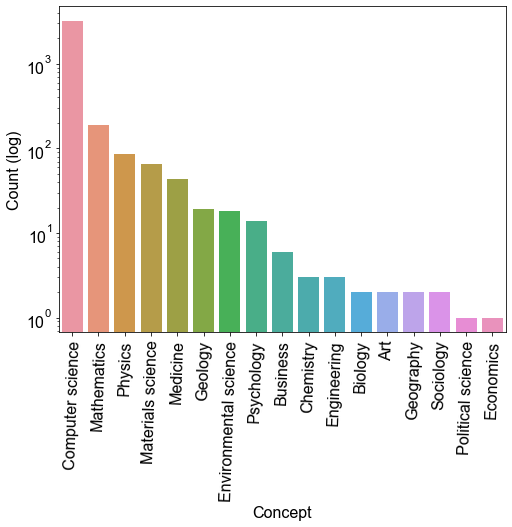

In [98]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = vis_l0_concepts, order = vis_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.ylabel('Count (log)')
plt.yscale('log')
plt.savefig('../results/supp/vis_L0.pdf', bbox_inches = 'tight')

In [99]:
ref_l0 = ref_unique[ref_unique.Level == 0]
ref_l0_concepts = ref_l0.Concept

In [100]:
ref_l0_dic = dict(Counter(ref_l0_concepts))
ref_l0_dic_df = pd.DataFrame(ref_l0_dic.items(), columns = ['concept', 'count'])
ref_l0_dic_df['ratio'] = round(
    ref_l0_dic_df['count'] / ref_l0_dic_df['count'].sum(),
    3)
ref_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
0,Computer science,32706,0.649
1,Mathematics,5479,0.109
9,Psychology,3041,0.060
2,Physics,1958,0.039
4,Medicine,1464,0.029
5,Materials science,892,0.018
3,Biology,811,0.016
7,Environmental science,591,0.012
10,Sociology,576,0.011
6,Geography,506,0.010


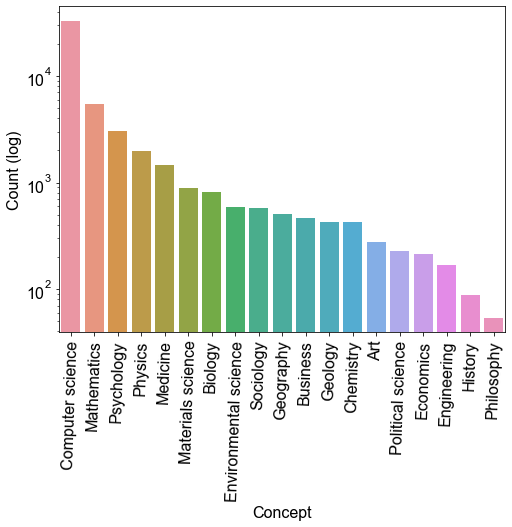

In [101]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = ref_l0_concepts, order = ref_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.yscale('log')
plt.ylabel('Count (log)')
plt.savefig('../results/supp/ref_L0.pdf', bbox_inches = 'tight')

In [102]:
cit_l0 = cit_unique[cit_unique.Level == 0]
cit_l0_concepts = cit_l0.Concept

In [103]:
cit_l0_dic = dict(Counter(cit_l0_concepts))
cit_l0_dic_df = pd.DataFrame(cit_l0_dic.items(), columns = ['concept', 'count'])
cit_l0_dic_df['ratio'] = round(
    cit_l0_dic_df['count'] / cit_l0_dic_df['count'].sum(),
    3)
cit_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
2,Computer science,53853,0.752
14,Mathematics,5144,0.072
4,Medicine,2033,0.028
7,Psychology,1669,0.023
5,Physics,1456,0.020
6,Biology,1374,0.019
15,Materials science,1282,0.018
9,Geography,827,0.012
11,Business,866,0.012
0,Sociology,576,0.008


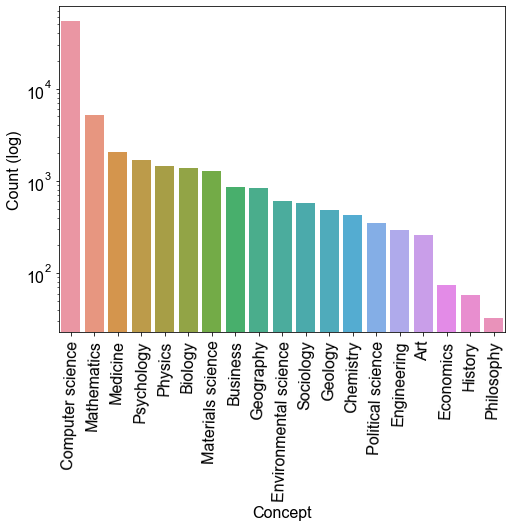

In [104]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = cit_l0_concepts, order = cit_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.ylabel('Count (log)')
plt.yscale('log')
plt.savefig('../results/supp/cit_L0.pdf', bbox_inches = 'tight')

## Popularity trends

In [105]:
vis_L1 = vis[vis.Level == 1]
vis_L1[vis_L1.Concept == 'Multimedia'].head(1)

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
242,2007,10.1109/VAST.2007.4389006,Jigsaw: Supporting Investigative Analysis thro...,10.0,10.0,Multimedia,https://openalex.org/C49774154,https://www.wikidata.org/wiki/Q131765,1.0,0.321249


In [106]:
vis_L2 = vis[vis.Level == 2]
len(list(set(vis_L2.Concept)))
vis_L2[vis_L2.Concept.str.contains('Cluster')].head(1)
## In L2, Flow (mathematics), and Volume (thermodynamics) were not Computer Science

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
21,1991,10.1109/VISUAL.1991.175815,Tree-maps: a space-filling approach to the vis...,17.0,13.0,Cluster analysis,https://openalex.org/C73555534,https://www.wikidata.org/wiki/Q622825,2.0,0.350092


## Heat map

In [107]:
cooccur_orig = pd.read_csv('../data/plots/co_occurrance/aggregated_cooccurance_df.csv')
sources = cooccur_orig['source']
targets = cooccur_orig['target']
values = cooccur_orig['value']
levels = cooccur_orig['level']
df2 = pd.DataFrame({
    'source': targets,
    'target': sources,
    'value': values,
    'level': levels
})
cooccur_orig = cooccur_orig.append(df2).reset_index(drop=True)

### Co-occur in Level 0

In [108]:
cooccur = cooccur_orig[(cooccur_orig.level == 0) & (cooccur_orig.value > 1)]
cooccur.head()

,source,target,value,level
0,Computer science,Mathematics,146,0
1,Physics,Computer science,73,0
2,Computer science,Materials science,52,0
3,Computer science,Medicine,40,0
4,Mathematics,Computer science,35,0


In [109]:
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)

In [110]:
# df_wide = df_wide.replace(
#     ['Artificial intelligence', 'Computer graphics (images)', 'Data science', 'Human-computer interaction', 'Machine learning'],
#     ['AI', 'Computer Graphics', 'DS', 'HCI', 'ML']
# )

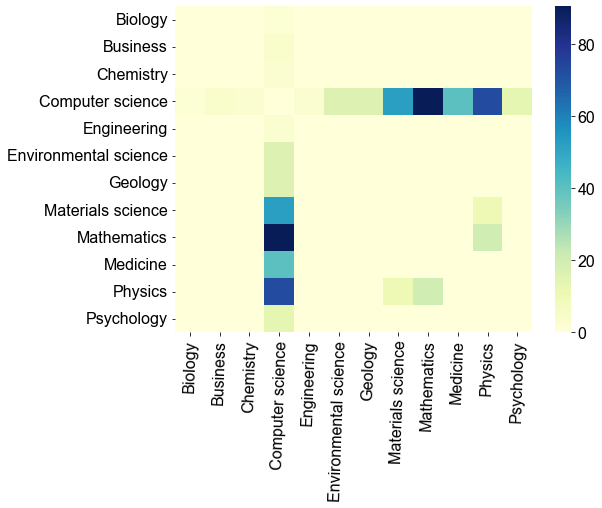

In [111]:
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
# g.set_title('A', loc = 'left')
plt.savefig('../results/supp/co_occur_L0.pdf', bbox_inches = 'tight')
# plt.savefig('../results/figures/heat.png', bbox_inches = 'tight')

### L1

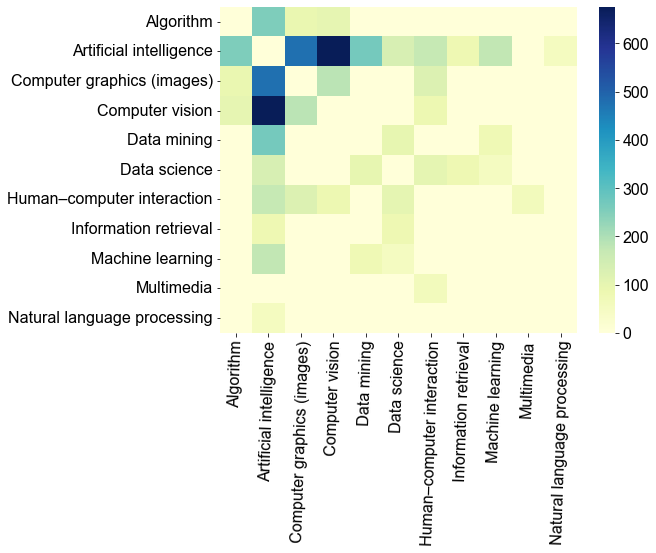

In [112]:
cooccur = cooccur_orig[(cooccur_orig.level == 1) & (cooccur_orig.value > 50)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L1.pdf', bbox_inches = 'tight')

###  L2

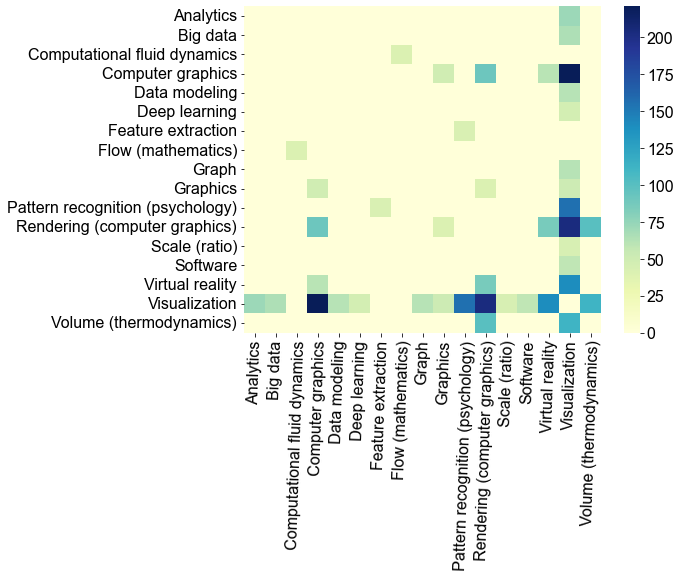

In [113]:
cooccur = cooccur_orig[(cooccur_orig.level == 2) & (cooccur_orig.value > 40)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L2.pdf', bbox_inches = 'tight')

### L3

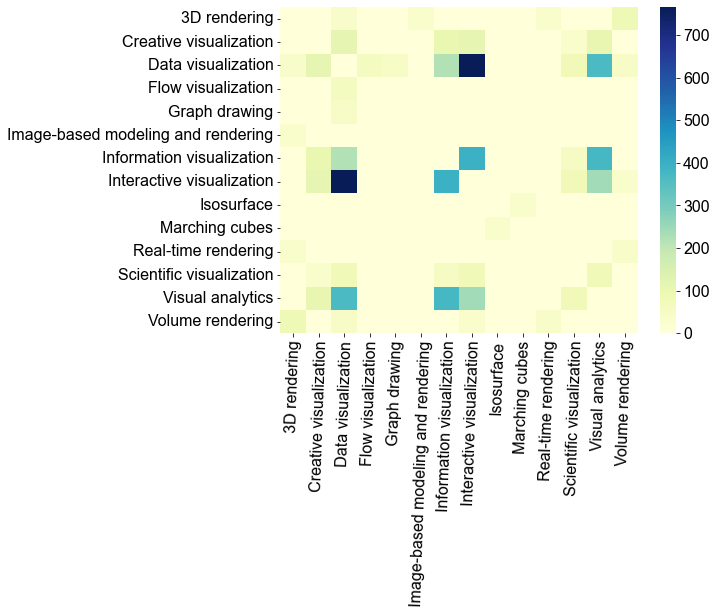

In [114]:
cooccur = cooccur_orig[(cooccur_orig.level == 3) & (cooccur_orig.value > 30)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L3.pdf', bbox_inches = 'tight')

## L1 concept evolution (Stack area chart)

To show the evolution of top ten (and 'Other') Level 1 Concepts of VIS publications over the past 32 years. 

In [115]:
df = vis
LEVEL = 1
level1_df = df[df.Level == LEVEL]
level1_df.head()

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
2,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,9.0,3.0,Information retrieval,https://openalex.org/C23123220,https://www.wikidata.org/wiki/Q816826,1.0,0.391768
3,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,9.0,4.0,Data science,https://openalex.org/C2522767166,https://www.wikidata.org/wiki/Q2374463,1.0,0.390022
8,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,9.0,9.0,Data mining,https://openalex.org/C124101348,https://www.wikidata.org/wiki/Q172491,1.0,0.322426
18,1991,10.1109/VISUAL.1991.175815,Tree-maps: a space-filling approach to the vis...,17.0,10.0,Artificial intelligence,https://openalex.org/C154945302,https://www.wikidata.org/wiki/Q11660,1.0,0.365130
23,1991,10.1109/VISUAL.1991.175815,Tree-maps: a space-filling approach to the vis...,17.0,15.0,Data mining,https://openalex.org/C124101348,https://www.wikidata.org/wiki/Q172491,1.0,0.338191


In [116]:
# top ten L1 concepts
dic = dict(Counter(level1_df.Concept).most_common(10))
top_ten = list(dic.keys())
top_ten

['Artificial intelligence',
 'Computer vision',
 'Computer graphics (images)',
 'Human–computer interaction',
 'Data science',
 'Algorithm',
 'Data mining',
 'Information retrieval',
 'Machine learning',
 'Multimedia']

In [117]:
# timeseries and rename those concepts not in top ten as "Other"
tuples = []
for group in level1_df.groupby('Year'):
    year = group[0]
    group[1]['Concept New'] = group[1].Concept.apply(
        lambda x: x if x in top_ten else 'Other'
    )
    for concept_group in group[1].groupby('Concept New'):
        concept = concept_group[0]
        count = concept_group[1].shape[0]
        tuples.append((year, concept, count))

In [118]:
# prepare for stack area chart
dff = pd.DataFrame(list(tuples), columns = ['year', 'concept', 'count'])
dff['Year'] = pd.to_datetime(dff['year'], format='%Y')
dff.replace({
    'Artificial intelligence': 'AI',
    'Human–computer interaction': 'HCI',
    'Computer graphics (images)': 'Computer grafics'
    
}, inplace=True)
dff.head()

,year,concept,count,Year
0,1990,Algorithm,5,1990-01-01
1,1990,AI,24,1990-01-01
2,1990,Computer grafics,19,1990-01-01
3,1990,Computer vision,12,1990-01-01
4,1990,Data mining,2,1990-01-01


In [119]:
alt.Chart(dff).mark_area().encode(
    x="Year:T",
    y=alt.Y(
        'count:Q',
        title = 'Number of publications',
    ),
    color=alt.Color(
        "concept:N",
        title = 'Fields of Study (L1)'
    )
).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_legend(
    titleFontSize=16,
    labelFontSize=16
).configure_range(
    category={'scheme': 'paired'}
).properties(
    width = 400
)

alt.Chart(...)